# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [23]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 設定 data_path
dir_data = '/Users/user/Desktop/機器學習百日馬拉松/資料集/'

### 之前做過的處理

In [3]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [4]:
app_train['SK_ID_CURR'].dtype == 'object'

False

In [5]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['YEAR_BIRTH'] = app_train['DAYS_BIRTH'] /365 

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

#### 觀察是否能還貸款的年齡平均

In [7]:
app_train.groupby('TARGET')['YEAR_BIRTH'].mean()
## 從結果可以看到年齡平均相差不大，因此畫圖來進一步觀察

TARGET
0    44.214182
1    40.780351
Name: YEAR_BIRTH, dtype: float64

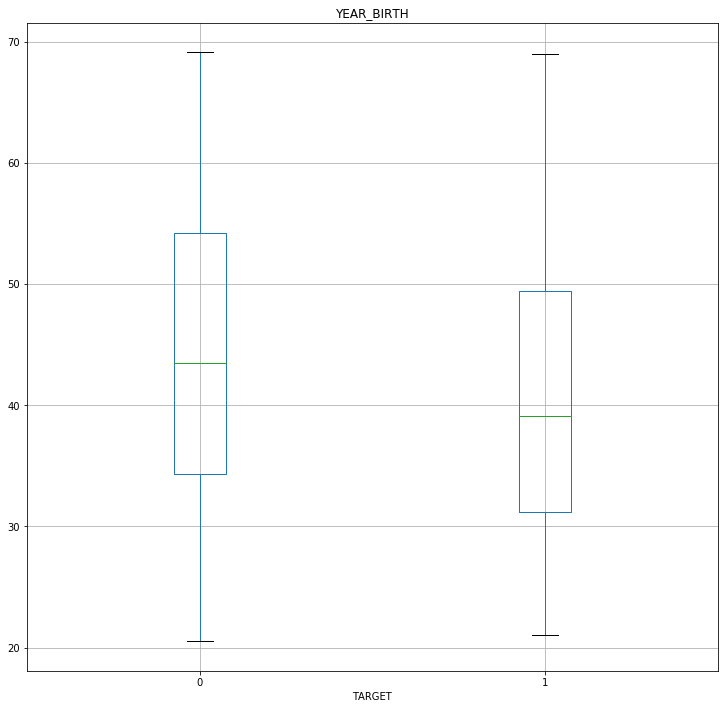


由箱型圖可以看到難以償還貸款的年齡層較窄較年輕，推測年齡較大的比較容易償還貸款，接下來加入性別作為分組基準和收入作為參考依據



In [8]:
app_train.boxplot(column='YEAR_BIRTH', by = 'TARGET', showfliers = False, figsize=(12,12)) # by:分組依據 column:應變數
plt.suptitle('')
plt.show()
print('''
由箱型圖可以看到難以償還貸款的年齡層較窄較年輕，推測年齡較大的比較容易償還貸款，接下來加入性別作為分組基準和收入作為參考依據
''')

#### 觀察性別和年齡的關係

In [9]:
app_train.groupby('CODE_GENDER')['YEAR_BIRTH'].mean()
## 可以看到本筆資料女性的年齡比男性大，接著加入是否能償還貸款進行分組

CODE_GENDER
F      45.212348
M      41.479591
XNA    37.154110
Name: YEAR_BIRTH, dtype: float64

In [10]:
app_train.groupby(['TARGET','CODE_GENDER'])['YEAR_BIRTH'].mean()
## 由結果可以看到不論能否償還貸款下，女性的年齡都比男性高，那來觀察不同性別下收入是否有差

TARGET  CODE_GENDER
0       F              45.480457
        M              41.689039
        XNA            37.154110
1       F              41.649962
        M              39.623861
Name: YEAR_BIRTH, dtype: float64

In [11]:
app_train.groupby(['CODE_GENDER'])['AMT_INCOME_TOTAL'].median()
## 在討論收入，使用中位數比較客觀，可以看到雖然女性年齡比較大，但在收入上卻跟男性有段差距

CODE_GENDER
F      135000.0
M      180000.0
XNA    182250.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [12]:
app_train.groupby(['TARGET','CODE_GENDER'])['AMT_INCOME_TOTAL'].median()
## 加上能否償還貸款，可以看到女性收入都不及男性，此外難以償還債款的收入普遍較低，但女性方面的收入卻相同

TARGET  CODE_GENDER
0       F              135000.0
        M              180000.0
        XNA            182250.0
1       F              135000.0
        M              157500.0
Name: AMT_INCOME_TOTAL, dtype: float64

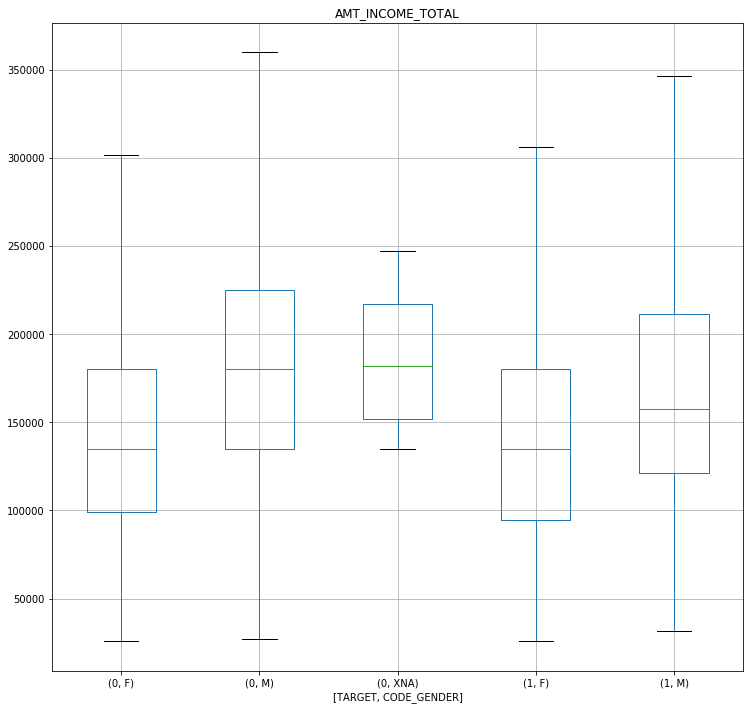

In [13]:
app_train.boxplot(column='AMT_INCOME_TOTAL', by = ['TARGET', 'CODE_GENDER'] , showfliers = False, figsize=(12,12)) # by:分組依據 column:應變數
plt.suptitle('')
plt.show()

In [ ]:
'''
由上方的箱型圖可以看到，女性在償還貸款與否的收入組成相差不多，能償還貸款的箱型還比較窄，
男性部分則是償還貸款的收入比較高，基礎推論在償還貸款上，男性會受到收入多寡的影響較重
'''

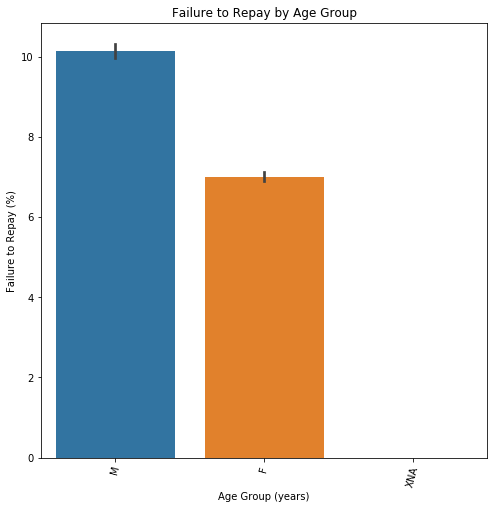

In [24]:
plt.figure(figsize = (8, 8))

# 以年齡區間為 x, target 為 y 繪製 barplot
"""
Your Code Here
"""
px = app_train['CODE_GENDER']
py = 100*app_train['TARGET']
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Gender');

## 由長條圖和綜合之前所述，女性較不受到收入影響，但男性會受到收入多寡而影響且難以償還貸款的比例也高於女性